# Customer Analytics

**Goal**: Using Analytics, we can predict behavior on customers. We can analyze all relevant data and develop focused customer retention programs to gain a competitive market edge. For this project we will analyze IBM watson analytics customer data, in order to understand customer demographics and buying behavior. We will use predictive analytics to analyze the ost profitable cutomers and how they interact, and in the end take target actions to increase profitable customer response, retention, and growth. 

**Introduction**: The importance of customer analytics is cruical to any business. It is critical for many businesses to be able to understand and predict what their customers are likley to purchase or view. The more a business understands about the customer, the better competitve power it will have against its competitors. 



## Load Data

The data set is available from IBM site: https://www.ibm.com/communities/analytics/watson-analytics-blog/marketing-customer-value-analysis/


In [8]:
#import packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')

In [3]:
df.shape

(9134, 24)

In [4]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

## Analyzing Engaged Customers

We want to analyze and understand how different customers behave ad react to different marketing strategies 

### Overall Engagement Rate

The response column indicates whether a customer responded to the marketing strategy. 


In [6]:
#total number of customers who have responded
df.groupby('Response').count()['Customer']

Response
No     7826
Yes    1308
Name: Customer, dtype: int64

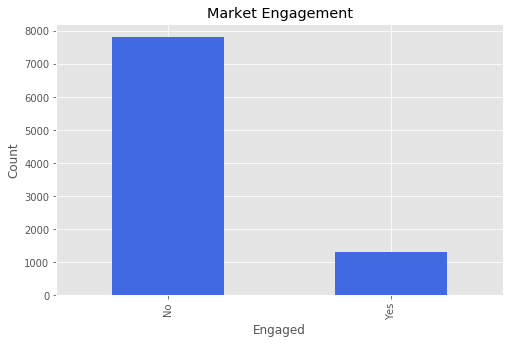

In [15]:
ax = df.groupby('Response').count()['Customer'].plot(kind='bar',
                                                    color='royalblue',
                                                    figsize=(8,5),
                                                    title='Market Engagement')
ax.set_xlabel('Engaged')
ax.set_ylabel('Count')
plt.show()



In [16]:
#percentage of engage vs non-engaged

df.groupby('Response').count()['Customer']/df.shape[0]

Response
No     0.856799
Yes    0.143201
Name: Customer, dtype: float64

From our plot and calculations we can see that only 14% of customers responded to the marketing calls.

### Engagement Rates by Offer Type

The Renew Offer Type column contains the type of the renewal offer presented to the customers. We want to look at what type of offers worked best for our engaged customers.

In [31]:
#get the engagement rates per renewal offer type

bot_df = df.loc[df['Response']== 'Yes', #count only engaged customers
               ].groupby([
                'Renew Offer Type' #engage customers grouped by renewal offer type
                ]).count()['Customer']/df.groupby('Renew Offer Type').count()['Customer']# engaged customers grouped by renewal offer type]) 

In [32]:
bot_df


Renew Offer Type
Offer1    0.158316
Offer2    0.233766
Offer3    0.020950
Offer4         NaN
Name: Customer, dtype: float64

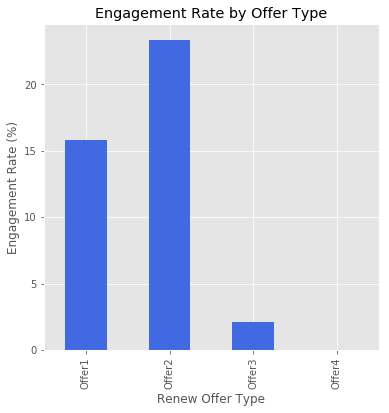

In [37]:
ax1 = (bot_df*100.0).plot(kind='bar',
                          figsize=(6,6),
                         color='royalblue',
                         title='Engagement Rate by Offer Type')
ax1.set_ylabel('Engagement Rate (%)')
plt.show()

**Offer 2** has the highest engagement rate among customers

### Offer Type & Vehicle Class

Lets try to understand how customers with different attributes respond differently to different marketing messages. 

In [38]:
bot_df = df.loc[df['Response'] == 'Yes',
               ].groupby(['Renew Offer Type','Vehicle Class'
                         ]).count()['Customer']/df.groupby('Renew Offer Type').count()['Customer']

In [39]:
bot_df

Renew Offer Type  Vehicle Class
Offer1            Four-Door Car    0.070362
                  Luxury Car       0.001599
                  Luxury SUV       0.004797
                  SUV              0.044776
                  Sports Car       0.011194
                  Two-Door Car     0.025586
Offer2            Four-Door Car    0.114833
                  Luxury Car       0.002051
                  Luxury SUV       0.004101
                  SUV              0.041012
                  Sports Car       0.016405
                  Two-Door Car     0.055366
Offer3            Four-Door Car    0.016760
                  Two-Door Car     0.004190
Name: Customer, dtype: float64

In [41]:
#lets make the output more readable
#by using pivots we can extract and transform data 
bot_df = bot_df.unstack().fillna(0)
bot_df

Vehicle Class,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car
Renew Offer Type,,,,,,
Offer1,0.070362,0.001599,0.004797,0.044776,0.011194,0.025586
Offer2,0.114833,0.002051,0.004101,0.041012,0.016405,0.055366
Offer3,0.016760,0.000000,0.000000,0.000000,0.000000,0.004190


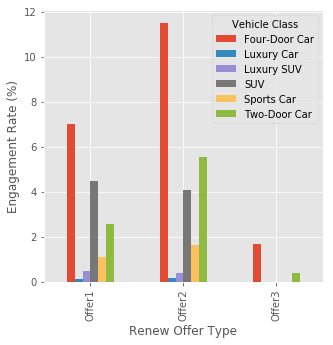

In [43]:
#visualize the data
ax2= (bot_df*100.0).plot(kind='bar',figsize=(5,5))
ax2.set_ylabel('Engagement Rate (%)')
plt.show()

From our previous chart we can see **offer 2** had the highest response rate from among our customers. Now we can gain more insights by having broken down the customer attribute. For this case we broke it down to Vehicle class'. We can notice that customers with 'Four-door cars' respond more frequently for all offer types and ones with 'Luxury cars' respond with a higher chance to offer 1 and offer 2. If we see any significant difference in the response rate, we can fine-tune who to target for different set of offers.

### Engagement Rates by Sales 

In [44]:
bs_df = df.loc[
    df['Response']== 'Yes'].groupby(['Sales Channel'
    ]).count()['Customer']/df.groupby('Sales Channel').count()['Customer']

In [45]:
bs_df

Sales Channel
Agent          0.191544
Branch         0.114531
Call Center    0.108782
Web            0.117736
Name: Customer, dtype: float64

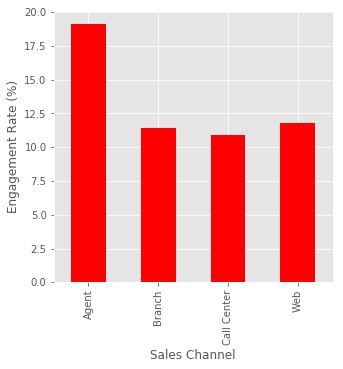

In [47]:
ax3 = (bs_df*100.0).plot(
    kind = 'bar',
    figsize=(5,5),
    color='red')

ax3.set_ylabel('Engagement Rate (%)')
plt.show()

As we can see Agents work best in terms of getting responses from customers, then Web. 

### Sales Channel & Vehicle Size 

In [49]:
bsc_df = df.loc[
    df['Response'] == 'Yes'].groupby([
    'Sales Channel', 'Vehicle Size'
]).count()['Customer']/df.groupby('Sales Channel').count()['Customer']


In [50]:
bsc_df

Sales Channel  Vehicle Size
Agent          Large           0.020708
               Medsize         0.144953
               Small           0.025884
Branch         Large           0.021036
               Medsize         0.074795
               Small           0.018699
Call Center    Large           0.013598
               Medsize         0.067989
               Small           0.027195
Web            Large           0.013585
               Medsize         0.095094
               Small           0.009057
Name: Customer, dtype: float64

In [51]:
#unstack the data 
bsc_df = bsc_df.unstack().fillna(0)

In [52]:
bsc_df

Vehicle Size,Large,Medsize,Small
Sales Channel,,,
Agent,0.020708,0.144953,0.025884
Branch,0.021036,0.074795,0.018699
Call Center,0.013598,0.067989,0.027195
Web,0.013585,0.095094,0.009057


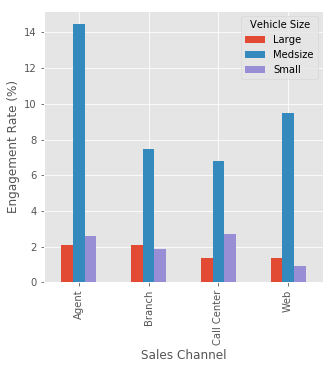

In [53]:
ax4 = (bsc_df*100.0).plot(
    kind='bar',
    figsize = (5,5)
)

ax4.set_ylabel('Engagement Rate (%)')
plt.show()

As we can see, customers with medium size vehicles respond the best. 

### Engagement Rates by Months Since Policy Inception

In [58]:
bmsi_df = df.loc[
    df['Response'] == 'Yes'
    ].groupby(
    by='Months Since Policy Inception')['Response'
    ].count()/ df.groupby(by='Months Since Policy Inception')['Response'].count() * 100.0

In [60]:
bmsi_df.fillna(0)

Months Since Policy Inception
0     14.457831
1     14.117647
2     20.224719
3     26.315789
4     19.780220
5      6.896552
6      0.000000
7      7.594937
8      7.407407
9     18.750000
10    15.789474
11    17.307692
12     6.000000
13    14.814815
14     0.000000
15    22.018349
16     0.000000
17    11.881188
18    13.333333
19    16.981132
20    11.650485
21    11.428571
22    12.903226
23    20.454545
24    21.951220
25    13.483146
26    15.000000
27    12.371134
28    17.475728
29    12.244898
        ...    
70    23.529412
71    12.000000
72    23.762376
73     6.818182
74    19.780220
75     6.122449
76     6.976744
77    18.947368
78     7.317073
79    11.881188
80    16.438356
81    15.789474
82     0.000000
83    24.000000
84     6.000000
85    14.117647
86     0.000000
87     7.894737
88     7.894737
89    18.556701
90    14.285714
91     8.000000
92    16.216216
93    26.666667
94    25.000000
95    15.584416
96    17.910448
97     0.000000
98     0.000000
99     7.6

In [ ]:
ax4 = bmsi_df.fillna(0).plot(
    figsize=(5,5),
    title = 'Engagement Rates by Months Since Inception',
    color = 'skyblue')

ax4.set_xlabel('Months Since Policy Inceptio')